# Sentiment Analysis

In [10]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [6]:
df.head(2)

,index1,date,title,text,length,clean_text,tfidf_uni,tfidf_tri,clusters1_uni,clusters2b,clusters3b
0,27.0,2022-04-27,How Long Does it Take to Get a Divorce in Illi...,"Before 2016, Illinois law famously, or infamou...",9649,illinois law famously infamously included twoy...,"['illinois', 'state', 'people', 'year', 'time'...","['social media accounts', 'illinois law requir...",0,NaN,8.0
1,92.0,2022-02-10,Edley: Illinois Democrats try to engineer arti...,By Bill Edley\nThe new Illinois 2022-2030 cong...,5496,edley illinois congressional map dubious disti...,"['chicago', 'illinois', 'state', 'year', 'poin...","['democratic national convention', 'illinois c...",0,NaN,3.0


### TextBlob Sentiment Polarity

In [8]:
import re
import sys
from textblob import TextBlob
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['cln_text_sentiment'] = ''

for idx, row in df.iterrows():
    blob = TextBlob(row['clean_text'])
    # print()str(blob.sentiment.classification)
    df.loc[idx,'cln_text_sentiment'] = blob.sentiment.polarity

In [29]:
df['sentiment'] = pd.cut(x=df['cln_text_sentiment'],bins=[-1, 0, 1], labels=['Negative', 'Positive']) 

In [30]:
df['sentiment'].value_counts()

Positive    26066
Negative    11521
Name: sentiment, dtype: int64

In [14]:
df.head(3)

,Unnamed: 0,index1,date,title,text,length,clean_text,tfidf_uni,tfidf_tri,clusters1_uni,text_ne,text_ner,cln_text_sentiment,sentiment,cluster_text
0,0,27.0,2022-04-27,How Long Does it Take to Get a Divorce in Illi...,"Before 2016, Illinois law famously, or infamou...",9649,illinois law famously infamously included twoy...,"['illinois', 'state', 'people', 'year', 'time'...","['social media accounts', 'illinois law requir...",0,<zip object at 0x7f9c39d28f00>,"{'faultbased': 3, 'illinois courts service pub...",0.012970,Positive,About Chicago/IL
1,1,92.0,2022-02-10,Edley: Illinois Democrats try to engineer arti...,By Bill Edley\nThe new Illinois 2022-2030 cong...,5496,edley illinois congressional map dubious disti...,"['chicago', 'illinois', 'state', 'year', 'poin...","['democratic national convention', 'illinois c...",0,<zip object at 0x7f9c39f61a50>,"{'democratic party': 3, 'budzinski': 1, 'congr...",0.033746,Positive,About Chicago/IL
2,2,182.0,2022-02-10,North Chicago Real Estate Lawyer | Waukegan Fo...,Bookmark According to information collected by...,3004,bookmark collected local outlets eviction mora...,"['chicago', 'illinois', 'state', 'covid', 'cit...","['chicago cook county', 'suburban cook county'...",0,<zip object at 0x7f9c3ac913c0>,"{'brett olmstead': 1, 'newland newland llp': 1...",0.024370,Positive,About Chicago/IL


In [31]:
df['sentiment'].value_counts()

Positive    26367
Negative    11876
Name: sentiment, dtype: int64

In [39]:
# resampled weekly
datetime_df = df[df['cln_text_sentiment'] < 0 ]
datetime_df = datetime_df[['date','cln_text_sentiment']]
# datetime_df.set_index('date',inplace=True)
print(datetime_df.shape)
datetime_df.head(3)
# datetime_df['cln_text_sentiment'].resample('W').mean().plot()

(11246, 2)


,date,cln_text_sentiment
3,2022-04-28,-0.004444
9,2022-04-06,-0.025357
10,2022-01-11,-0.041667


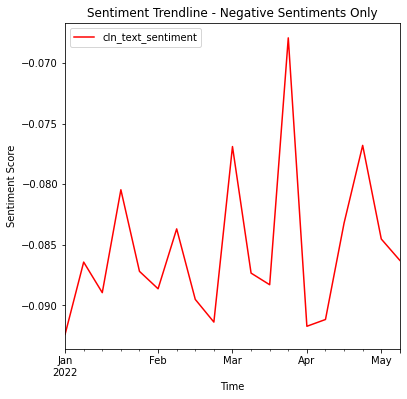

In [40]:

datetime_df.groupby(pd.Grouper(key="date", freq="W")).mean().plot(figsize=(6, 6), color = 'red')
# plt.figure()
# plt.axhline(y=0, color='r', linestyle='-')
plt.title('Sentiment Trendline - Negative Sentiments Only')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.show()